In [2]:
import pandas as pd
import numpy as np 
import time 
from tqdm import tqdm 
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_log_error, r2_score, mean_squared_error 
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge 
from sklearn.linear_model import LassoCV, RidgeCV 
from yellowbrick.regressor import AlphaSelection

from sklearn.linear_model import Lasso

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.svm import SVR 
from sklearn.ensemble import AdaBoostRegressor

import xgboost as xgb

C:\Users\tab\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
data_le = pd.read_csv('data_le.csv')
data_le.drop('Unnamed: 0', axis=1, inplace=True)



# Scaling using minmax scaler

In [6]:
norm = MinMaxScaler()
data_le['price'] = np.log(data_le['price'])
data_le.milage = norm.fit_transform(np.array(data_le['milage']).reshape(-1,1))
data_le.band = norm.fit_transform(np.array(data_le['band']).reshape(-1, 1))
data_le.model = norm.fit_transform(np.array(data_le['model']).reshape(-1, 1))
data_le['place'] = norm.fit_transform(np.array(data_le['place']).reshape(-1, 1))

# q1,q3 = data_le.price.quantile([0.25, 0.75])
# o1 = q1-1.5*(q3-q1)
# o2 = q3+1.5*(q3-q1)
# data_le.price = data_le[(data_le.price>o1) & (data_le.price<=o2)]
# data_le = data_le.dropna()



In [7]:

#function to split dataset int training and test
def trainingData(df,n):
    X = df.iloc[:,n]
    y = df.iloc[:,-1:].values.T
    y=y[0]
    X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.9,test_size=0.1,random_state=0)
    return (X_train,X_test,y_train,y_test)

# X_train,X_test,y_train,y_test=trainingData(data_ohe,list(range(len(list(data_ohe.columns))-1)))
X_train,X_test,y_train,y_test=trainingData(data_le,list(range(len(list(data_le.columns))-1)))

In [8]:
#some of models will predict neg values so this function will remove that values
def remove_neg(y_test,y_pred):
    ind=[index for index in range(len(y_pred)) if(y_pred[index]>0)]
    y_pred=y_pred[ind]
    y_test=y_test[ind]
    y_pred[y_pred<0]
    return (y_test,y_pred)

#function for evaluation of model
def result(y_test,y_pred):
    r=[]
    r.append(mean_squared_log_error(y_test, y_pred))
    r.append(np.sqrt(r[0]))
    r.append(r2_score(y_test,y_pred))
    r.append(round(r2_score(y_test,y_pred)*100,4))
    r.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    return (r)

#dataframe that store the performance of each model
accu=pd.DataFrame(index=['MSLE', 'Root MSLE', 'R2 Score','Accuracy(%)','RMSE'])

# Model Implementation
1. Linear Regression
2. Ridge Regression
3. Lasso Regression
4. K. Neighbors Regressor
5. Random Forest Regressor
6. Bagging Regressor
7. Adaboost Regressor
8. XGBoost

# 1. Linear Regreesion

In [9]:
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred=LR.predict(X_test)

Linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). In this case we using all dataset features as dependent variables, and price  feature as independent variable. 


In [10]:

#calculating error/accuracy
y_test_1,y_pred_1=remove_neg(y_test,y_pred)
r1_lr=result(y_test_1,y_pred_1)
print('Coefficients: \n', LR.coef_)

print("MSLE : {}".format(r1_lr[0]))
print("Root MSLE : {}".format(r1_lr[1]))
print("R2 Score : {} or {}%".format(r1_lr[2],r1_lr[3]))
print("RMSE : {}".format(r1_lr[4]))
accu['Linear Regression']=r1_lr

Coefficients: 
 [ 0.15793306  0.07707847  0.08315237  0.02628578 -0.26302302  0.03378266
  0.03727232 -0.09156119 -0.0025185   0.05137265]
MSLE : 0.0001784411143822898
Root MSLE : 0.013358185295252114
R2 Score : 0.3792015675328002 or 37.9202%
RMSE : 0.2636467207303533


Coefficients: The sign of each coefficient indicates the direction of the relationship between a predictor variable and the response variable.
A positive sign indicates that as the predictor variable increases, the response variable also increases.
A negative sign indicates that as the predictor variable increases, the response variable decreases.



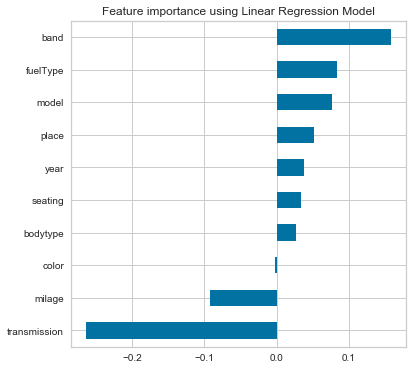

In [11]:
coef = pd.Series(LR.coef_, index = X_train.columns)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Linear Regression Model")
plt.savefig('Linear-Regression-Feature-Importance.jpg')
plt.show()




Considering this figure, linear regression suggests that band, fueltype,and model these three variables are the most important.


# 2. Ridge Regression

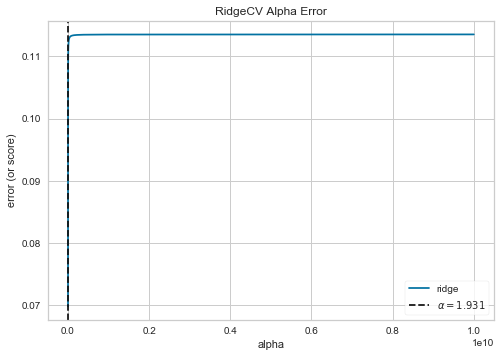

In [8]:
alphas = 10**np.linspace(10,-2,400)
model = RidgeCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(X_train,y_train)
visualizer.show()

From the figure, the best value of alpha to fit the dataset is 1.931
Note: The value of alpha is not constant it varies every time.
Using this value of alpha, Ridgeregressor is implemented.

In [9]:
#model object and fitting model
RR=Ridge(alpha=0.191,solver='auto')
RR.fit(X_train,y_train)
y_pred=RR.predict(X_test)

Ridge Regression is a technique for analyzing multiple regression data that suffer from multicollinearity. When multicollinearity occurs, least squares estimates are unbiased, but their variances are large so they may be far from the true value.

In [10]:
#model evaluation

y_test_2,y_pred_2=remove_neg(y_test,y_pred)
r2_ridge=result(y_test_2,y_pred_2)
print("MSLE : {}".format(r2_ridge[0]))
print("Root MSLE : {}".format(r2_ridge[1]))
print("R2 Score : {} or {}%".format(r2_ridge[2],r2_ridge[3]))
print("RMSE : {}".format(r2_ridge[4]))
accu['Ridge Regression']=r2_ridge

MSLE : 0.00017844110209035542
Root MSLE : 0.013358184835162127
R2 Score : 0.37920161691844034 or 37.9202%
RMSE : 0.2636467102435659


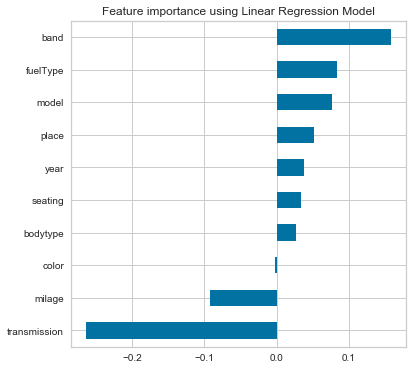

In [12]:
#Ploting feature importance graph

coef = pd.Series(LR.coef_, index = X_train.columns)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Linear Regression Model")
plt.savefig('Linear-Regression-Feature-Importance.jpg')
plt.show()


Considering this figure, ridge regression suggests that band, fueltype,and model are the most important.


# 3 Lasso Regression

In [15]:
#model object and fitting it
lasso=Lasso(alpha=0.00003)
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)

In [16]:
y_test_3,y_pred_3=remove_neg(y_test,y_pred)
r3_lasso=result(y_test_3,y_pred_3)
print("MSLE : {}".format(r3_lasso[0]))
print("Root MSLE : {}".format(r3_lasso[1]))
print("R2 Score : {} or {}%".format(r3_lasso[2],r3_lasso[3]))
print("RMSE : {}".format(r3_lasso[4]))
accu['Lasso Regression']=r3_lasso

MSLE : 0.00017843499947591614
Root MSLE : 0.013357956410915412
R2 Score : 0.37922406457048974 or 37.9224%
RMSE : 0.2636419435566046


Lasso is similiar to ridge but Lassso selects the only some feature while reduces the coefficients of others to zero. This property is known as feature selection and which is absent in case of ridge.

# 4 Random Forest

In [13]:
#Split data using label encoding data which is best for tree-based model

# X_train,X_test,y_train,y_test=trainingData(data_ohe,list(range(len(list(data_ohe.columns))-1)))
X_train,X_test,y_train,y_test=trainingData(data_le,list(range(len(list(data_le.columns))-1)))

In [14]:
RFR = RandomForestRegressor(n_estimators=180,random_state=0, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)
RFR.fit(X_train,y_train)
y_pred = RFR.predict(X_test)

The random forest is a classification algorithm consisting of many decision trees. It uses bagging and feature randomness when building each tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree. Read More
In our model, 180 decisions are created with max_features 0.5

For regression analysis, they are an ensemble of different regression trees and are used for nonlinear multiple regression. Each leaf contains a distribution for the continuous output variable/s.

In [15]:
r5_rf=result(y_test,y_pred)
print("MSLE : {}".format(r5_rf[0]))
print("Root MSLE : {}".format(r5_rf[1]))
print("R2 Score : {} or {}%".format(r5_rf[2],r5_rf[3]))
print("RMSE : {}".format(r5_rf[4]))
accu['RandomForest Regressor']=r5_rf

MSLE : 1.8063214768912242e-05
Root MSLE : 0.004250084089628374
R2 Score : 0.9378475239654638 or 93.7848%
RMSE : 0.08342117169643153


The performance of the Random forest is good. Since the random forest is using bagging when building each tree so next Bagging Regressor will be performed.

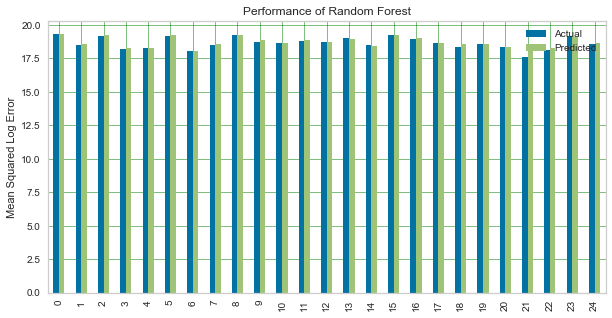

In [16]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check = df_check.head(25)
#round(df_check,2)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance of Random Forest')
plt.ylabel('Mean Squared Log Error')
plt.savefig('Random-Forest-Performance.jpg')
plt.show()

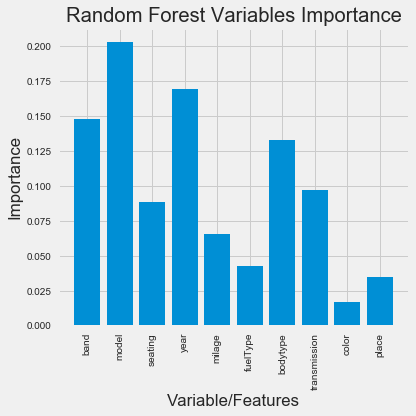

In [17]:

importances=RFR.feature_importances_
features=X_train.columns

# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.figure(figsize=(6,6))
plt.bar(x_values, importances, orientation = ('vertical'))
# Tick labels for x axis
plt.xticks(x_values, features, rotation=(90))
# Axis labels and title
plt.ylabel('Importance'); 
plt.xlabel('Variable/Features'); 
plt.title('Random Forest Variables Importance')
plt.tight_layout()
plt.savefig('Random-Forest-Variables-Importances.jpg',dpi=600)
plt.show();




Considering this figure, Random forest regression suggests that band, year,and model these three variables are the most important.


# 6 Bagging Regressor

In [21]:
#model implementation
baggReg=BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=20),n_estimators=50, random_state=1,
                         max_samples=1.0, max_features=1.0, bootstrap=False, 
                         bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=-1, verbose=0)
baggReg.fit(X_train,y_train)
y_pred=baggReg.predict(X_test)

A Bagging regressor is an ensemble meta-estimator that fits base regressors each on random subsets of the original dataset and then aggregates their predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

In our model, DecisionTreeRegressor is used as the estimator with max_depth=20 which creates 50 decision trees

In [19]:

#model evaluation
r6_br=result(y_test,y_pred)
print("MSLE : {}".format(r6_br[0]))
print("Root MSLE : {}".format(r6_br[1]))
print("R2 Score : {} or {}%".format(r6_br[2],r6_br[3]))
print("RMSE : {}".format(r6_br[4]))

MSLE : 2.8360057514316612e-05
Root MSLE : 0.00532541618226375
R2 Score : 0.9026355202260633 or 90.2636%
RMSE : 0.10441126125467846


The performance of Random Forest is better than Bagging regressor.

The key difference between Random forest and Bagging: The fundamental difference is that in Random forests, only a subset of features are selected at random out of the total and the best split feature from the subset is used to split each node in a tree, unlike in bagging where all features are considered for splitting a node.

In [20]:
accu['Bagging Regressor']=r6_br
accu.to_csv('errors.csv')

# 7. Adaboost 

In [21]:
#model implementation
ABR = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=24),
    n_estimators=200,learning_rate=0.6
)

ABR.fit(X_train, y_train)
y_pred = ABR.predict(X_test)

AdaBoost can be used to boost the performance of any machine learning algorithm. Adaboost helps you combine multiple “weak classifiers” into a single “strong classifier”

In [22]:

#model evaluation
r7_ab=result(y_test,y_pred)
print("MSLE : {}".format(r7_ab[0]))
print("Root MSLE : {}".format(r7_ab[1]))
print("R2 Score : {} or {}%".format(r7_ab[2],r7_ab[3]))
print("RMSE : {}".format(r7_ab[4]))

MSLE : 2.377215273366211e-05
Root MSLE : 0.004875669465177281
R2 Score : 0.9177261135255838 or 91.7726%
RMSE : 0.09597940971080739


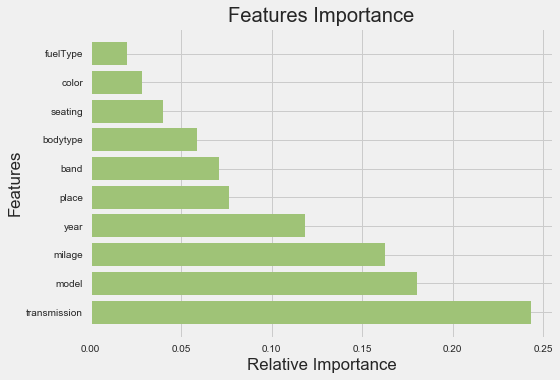

In [23]:
importances=ABR.feature_importances_
features=X_train.columns

indices = np.argsort(importances)
indices = [x for x in reversed(indices)]
plt.figure(1)
plt.title('Features Importance')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig('Adaboost-Features-Importance2.jpg',dpi=60)
plt.show();

Considering this figure, Ada Boost regression suggests that transmision, milage,and model these three variables are the most important.

In [24]:
accu['AdaBoost Regressor']=r7_ab
accu.to_csv('errors.csv')

# 8. XGBOOST

In [25]:
#model implementation and fitting data
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.4,
                max_depth = 24, alpha = 5, n_estimators = 200)
xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_test)

XGBoost is an ensemble learning method.XGBoost is an implementation of gradient boosted decision trees designed for speed and performance. The beauty of this powerful algorithm lies in its scalability, which drives fast learning through parallel and distributed computing and offers efficient memory usage.

In [26]:
#model evaluation
y_test_1,y_pred_1=remove_neg(y_test,y_pred)
r8_xg=result(y_test_1,y_pred_1)
print("MSLE : {}".format(r8_xg[0]))
print("Root MSLE : {}".format(r8_xg[1]))
print("R2 Score : {} or {}%".format(r8_xg[2],r8_xg[3]))
print("RMSE : {}".format(r8_xg[4]))

MSLE : 2.0150437071755394e-05
Root MSLE : 0.004488923821112962
R2 Score : 0.9304877765729395 or 93.0488%
RMSE : 0.08822215420090851


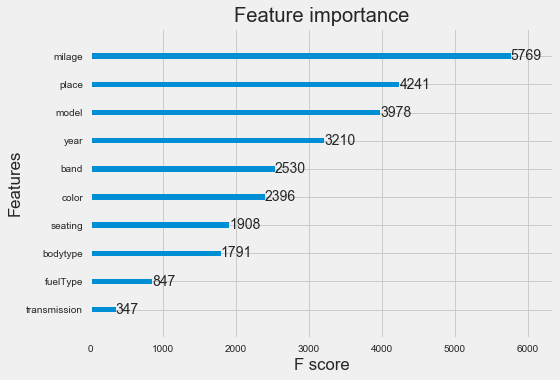

In [27]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.tight_layout()
plt.savefig('XGBoost-Features-Importance.jpg')
plt.show();

Considering this figure, XGBoost regression suggests that place, milage,and model these three variables are the most important.

In [28]:
accu['XGBoost Regressor']=r8_xg
accu.to_csv('errors.csv')

# Overall Result

In [29]:
accu=pd.read_csv('./errors.csv',index_col=0)
accu


,Linear Regression,Ridge Regression,Lasso Regression,RandomForest Regressor,Bagging Regressor,AdaBoost Regressor,XGBoost Regressor
MSLE,0.000178,0.000178,0.000178,0.000018,0.000028,0.000024,0.000020
Root MSLE,0.013358,0.013358,0.013358,0.004250,0.005325,0.004876,0.004489
R2 Score,0.379202,0.379202,0.379209,0.937848,0.902636,0.917726,0.930488
Accuracy(%),37.920200,37.920200,37.920900,93.784800,90.263600,91.772600,93.048800
RMSE,0.263647,0.263647,0.263645,0.083421,0.104411,0.095979,0.088222


In [30]:
model_accuracy=accu.loc['Accuracy(%)']

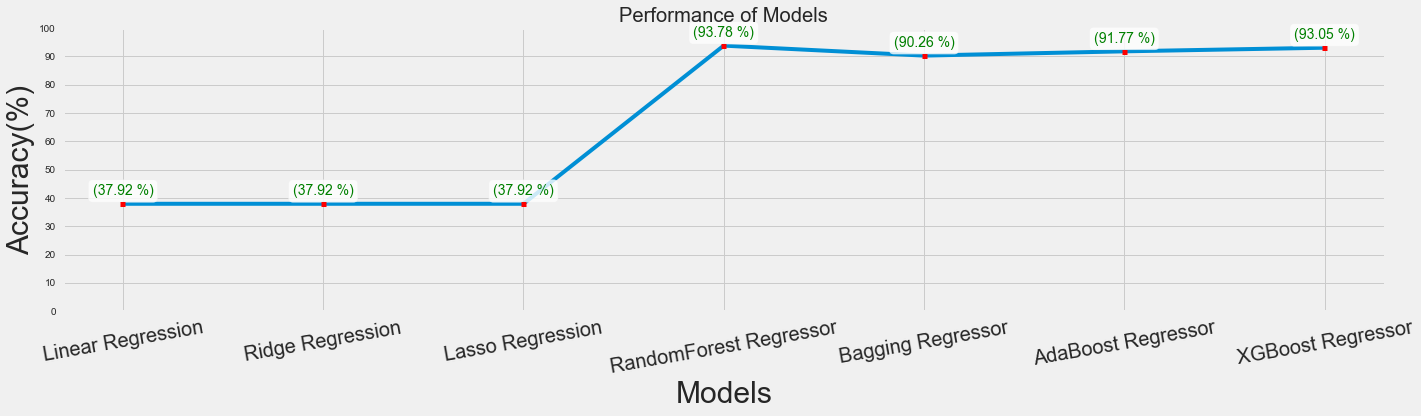

In [31]:
x=list(range(len(model_accuracy)))
y=list(range(0,101,10))
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.figure(figsize=(20,6))
plt.plot(model_accuracy)
plt.yticks(y)
plt.xticks(fontsize=20)
plt.xticks(rotation = (10))
plt.xlabel("Models",fontsize=30)
plt.ylabel("Accuracy(%)",fontsize=30)
plt.title("Performance of Models")
for a,b in zip(x,y):
    b=model_accuracy[a]
    val="("+str(round(model_accuracy[a],2))+" %)"
    plt.text(a, b+4.5, val,horizontalalignment='center',verticalalignment='center',color='green',bbox=props)
    plt.text(a, b+3.5, '.',horizontalalignment='center',verticalalignment='center',color='red',fontsize=50)
plt.tight_layout()
plt.savefig('Overall-Performance.jpg',dpi=600)
plt.show();

From result above, it can be seen that Random Forest Regressor has accuracy score 93.7848 which is the best accuracy score among 8 different model , Random Forest Regressor was also have the lower RMSE & RMSLE which is error metric to measure the performance of regression models

# Save the model

After modelling of machine learning, now we can save the model using Joblib to use it for next stage.

In [32]:
import joblib

In [34]:
filename = 'finalized_model.sav'
joblib.dump(RFR, 'finalized_model.sav')


['finalized_model.sav']